#  Projet EA Data Camp: Predict the Criminals 








# 1. Introduction 

#### Ce projet est un challenge proposé sur le platform de HackerEarth sur le lien suivant [HackerEarth](https://www.hackerearth.com/en-us/challenge/competitive/predict-the-criminal/instructions/) .
La Méthode que nous allons préceder pour ce projet consiste à faire d'abord de l'Analyse de Données Exploratoire puis de faire de faire des prédictions avec les algorithmes de machine learning. 

## 1.1. Description des données

Il y a eu une montée dans des crimes engagés ces dernières années, faisant le crime une cause supérieure de préoccupation pour l'application de la loi. Si nous pouvons estimer si quelqu'un va commettre un crime dans l'avenir, nous pouvons prendre ses précautions et être préparé.
Pour cela nous disposons d'un jeu de données contenant des réponses à des question diverses concernant concernant les vies privées et proffetionnelles de plusieurs personnes.
Quelques-uns d'entre eux ont été arrêtés pour des petits et grands crimes divers dans le passé.
Nous utiliser les données données pour prévoir si les gens dans les données de test commettraient un crime. 
Les données de train consistent en 45718 lignes, tandis que les données de test consistent en 11430 lignes.


In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline




## 1.2. Chargement des données 



In [5]:
train = pd.read_csv('C:/Users/hp/Desktop/Cours_3A/DataCamp/Projet_data_camp/criminal_train.csv')
test = pd.read_csv('C:/Users/hp/Desktop/Cours_3A/DataCamp/Projet_data_camp/criminal_test.csv')

print('train shape:', train.shape)
print('test shape:', test.shape)

print(train.shape[0], 'train samples')
print(test.shape[0], 'test samples')

train shape: (45718, 72)
test shape: (11430, 71)
45718 train samples
11430 test samples


In [6]:
train.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,25095143,4,2,4,1,3,1,1,1,99,...,1,2,1,1,2,2,3884.805998,40026,1,0
1,13005143,4,1,3,1,2,1,1,1,99,...,2,2,2,3,2,2,1627.108106,40015,2,1
2,67415143,4,1,2,1,2,1,1,1,99,...,2,2,2,3,2,2,4344.957980,40024,1,0
3,70925143,4,0,2,1,1,1,1,1,99,...,2,2,1,1,2,2,792.521931,40027,1,0
4,75235143,1,0,6,1,4,1,1,1,99,...,2,2,2,2,2,2,1518.118526,40001,2,0


In [7]:
# Regardons s'il y a données manquantes dans notre jeu donnés 
pd.isnull(train).head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
train.isnull().sum().head()

PERID       0
IFATHER     0
NRCH17_2    0
IRHHSIZ2    0
IIHHSIZ2    0
dtype: int64

Nous remarquons qu'il y a pas de donner `missing values` dans notre jeu de données. Et pourtant oui nous allons voir dans la suite qu'il contient belle et bien des `missing values` puisqu'il contient des valeurs `-1` comme nous le montre le résumé ci-dessous de notre jeu de données `train`.   

In [9]:
# le résumé des données
print(train.describe(include='all').head())

              PERID       IFATHER      NRCH17_2      IRHHSIZ2      IIHHSIZ2  \
count  4.571800e+04  45718.000000  45718.000000  45718.000000  45718.000000   
mean   5.445446e+07      3.355549      0.476486      3.426375      1.001706   
std    2.553911e+07      1.176651      0.888472      1.427420      0.061314   
min    1.000222e+07     -1.000000     -1.000000     -1.000000     -1.000000   
25%    3.233189e+07      4.000000      0.000000      2.000000      1.000000   

           IRKI17_2      IIKI17_2      IRHH65_2      IIHH65_2      PRXRETRY  \
count  45718.000000  45718.000000  45718.000000  45718.000000  45718.000000   
mean       2.084124      1.007437      1.162606      1.011024     97.394943   
std        1.102988      0.123162      0.469029      0.146444     12.355156   
min       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
25%        1.000000      1.000000      1.000000      1.000000     99.000000   

           ...            TOOLONG      TROUBUND   

In [10]:
train.dtypes

PERID          int64
IFATHER        int64
NRCH17_2       int64
IRHHSIZ2       int64
IIHHSIZ2       int64
IRKI17_2       int64
IIKI17_2       int64
IRHH65_2       int64
IIHH65_2       int64
PRXRETRY       int64
PRXYDATA       int64
MEDICARE       int64
CAIDCHIP       int64
CHAMPUS        int64
PRVHLTIN       int64
GRPHLTIN       int64
HLTINNOS       int64
HLCNOTYR       int64
HLCNOTMO       int64
HLCLAST        int64
HLLOSRSN       int64
HLNVCOST       int64
HLNVOFFR       int64
HLNVREF        int64
HLNVNEED       int64
HLNVSOR        int64
IRMCDCHP       int64
IIMCDCHP       int64
IRMEDICR       int64
IIMEDICR       int64
              ...   
CELLNOTCL      int64
CELLWRKNG      int64
IRFAMSOC       int64
IIFAMSOC       int64
IRFAMSSI       int64
IIFAMSSI       int64
IRFSTAMP       int64
IIFSTAMP       int64
IRFAMPMT       int64
IIFAMPMT       int64
IRFAMSVC       int64
IIFAMSVC       int64
IRWELMOS       int64
IIWELMOS       int64
IRPINC3        int64
IRFAMIN3       int64
IIPINC3      

In [11]:
train.head(4)

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,25095143,4,2,4,1,3,1,1,1,99,...,1,2,1,1,2,2,3884.805998,40026,1,0
1,13005143,4,1,3,1,2,1,1,1,99,...,2,2,2,3,2,2,1627.108106,40015,2,1
2,67415143,4,1,2,1,2,1,1,1,99,...,2,2,2,3,2,2,4344.957980,40024,1,0
3,70925143,4,0,2,1,1,1,1,1,99,...,2,2,1,1,2,2,792.521931,40027,1,0


### Combien de criminels avons nous dans notre jeu de données ?

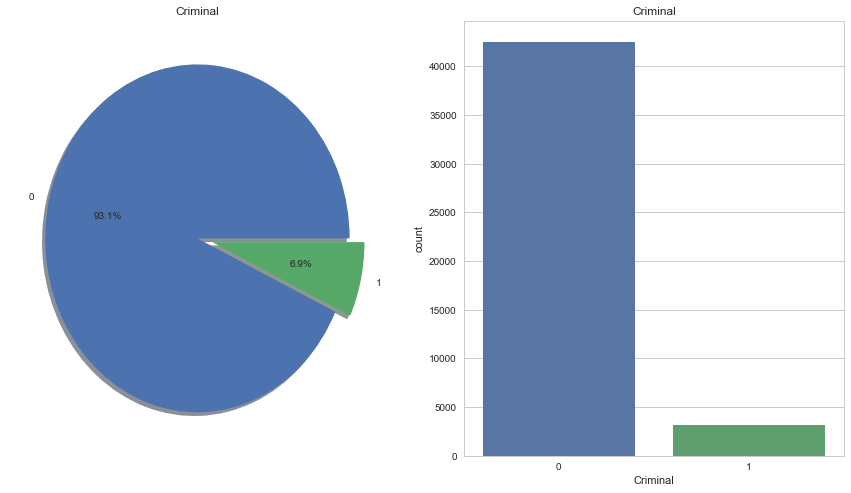

In [12]:
f,ax=plt.subplots(1,2,figsize=(15,8))
train['Criminal'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Criminal')
ax[0].set_ylabel('')
sns.countplot('Criminal',data=train,ax=ax[1])
ax[1].set_title('Criminal')
plt.show()

Tant mieux qu'on pas beaucoup de criminels dans notre jeu de données d'entrainement soit 6,9 %. 





## Statistique descriptive de certaines variables 

Faisons une petite annalyse de certaines variables suivant les classe d'âge des individus.

###   a) cas des parents dans les maisons 

In [13]:
pd.crosstab(train.IFATHER, train.Criminal, margins= True).style.background_gradient(cmap='Accent_r')

Criminal,0,1,All
IFATHER,,,
-1,2,0,2
1,7168,612,7780
2,2605,445,3050
3,10,3,13
4,32758,2115,34873
All,42543,3175,45718


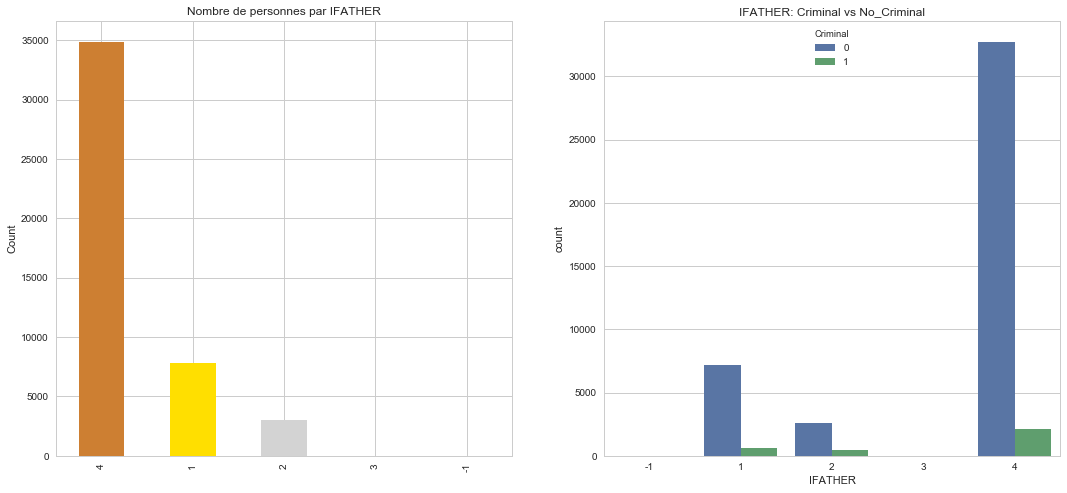

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['IFATHER'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Nombre de personnes par IFATHER')
ax[0].set_ylabel('Count')
sns.countplot('IFATHER',hue='Criminal',data=train,ax=ax[1])
ax[1].set_title('IFATHER: Criminal vs No_Criminal')
plt.show()

#### b) cas des enfants dont leur âge est inferieur à 18

In [15]:
pd.crosstab(train.NRCH17_2, train.Criminal, margins= True).style.background_gradient(cmap='Accent_r')

Criminal,0,1,All
NRCH17_2,,,
-1,75,9,84
0,30646,2829,33475
1,4841,158,4999
2,4496,115,4611
3,2485,64,2549
All,42543,3175,45718


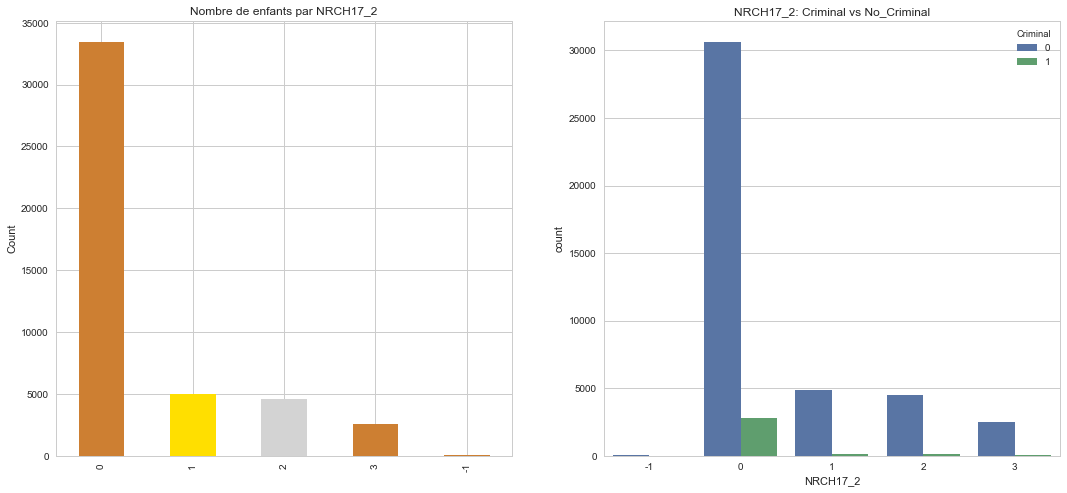

In [16]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['NRCH17_2'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Nombre de enfants par NRCH17_2')
ax[0].set_ylabel('Count')
sns.countplot('NRCH17_2',hue='Criminal',data=train,ax=ax[1])
ax[1].set_title('NRCH17_2: Criminal vs No_Criminal')
plt.show()

#### c) cas des personnes âgés (âge >= 65) 

In [17]:
pd.crosstab(train.IRHH65_2, train.Criminal, margins= True).style.background_gradient(cmap='Accent_r')

Criminal,0,1,All
IRHH65_2,,,
-1,2,0,2
1,37807,2381,40188
2,3160,458,3618
3,1574,336,1910
All,42543,3175,45718


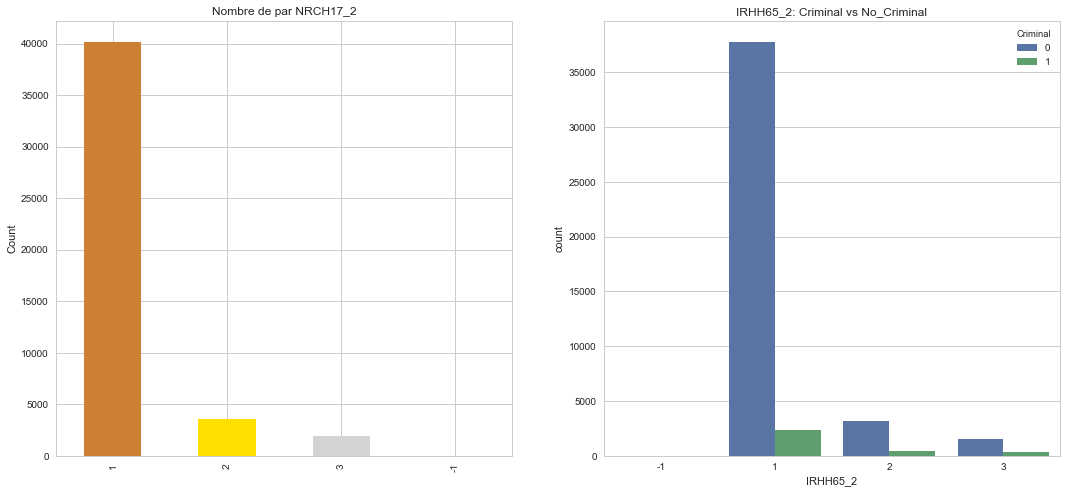

In [18]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['IRHH65_2'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Nombre de par NRCH17_2')
ax[0].set_ylabel('Count')
sns.countplot('IRHH65_2',hue='Criminal',data=train,ax=ax[1])
ax[1].set_title('IRHH65_2: Criminal vs No_Criminal')
plt.show()

In [19]:
#sns.factorplot(x='Criminal', col='POVERTY3', kind='count', data=train)

#### d) cas des personnes pauvres  

In [20]:
pd.crosstab(train.POVERTY3, train.Criminal, margins= True).style.background_gradient(cmap='Accent_r')

Criminal,0,1,All
POVERTY3,,,
-1,237,106,343
1,8489,842,9331
2,8767,1458,10225
3,25050,769,25819
All,42543,3175,45718


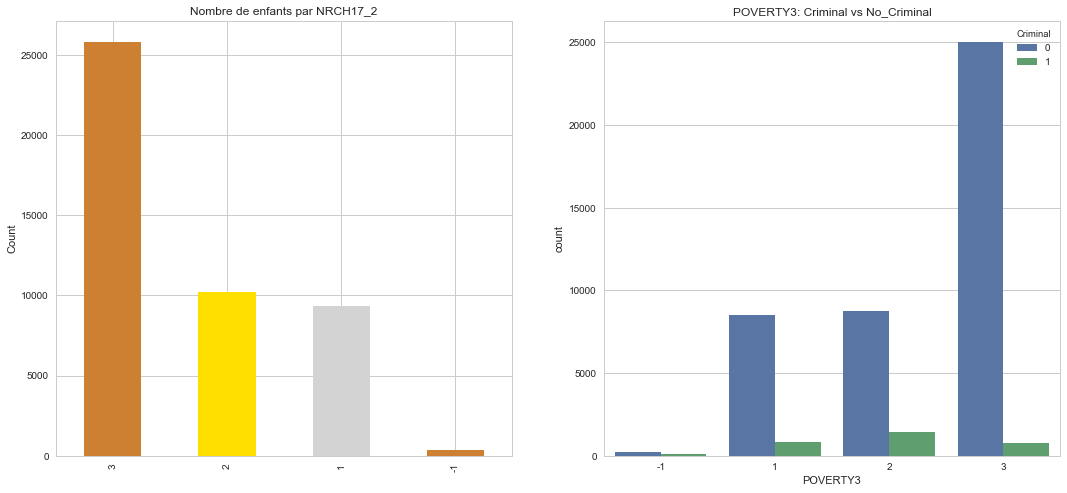

In [21]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['POVERTY3'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Nombre de enfants par NRCH17_2')
ax[0].set_ylabel('Count')
sns.countplot('POVERTY3',hue='Criminal',data=train,ax=ax[1])
ax[1].set_title('POVERTY3: Criminal vs No_Criminal')
plt.show()

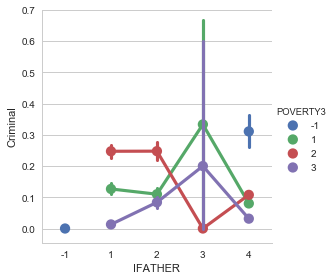

In [22]:
sns.factorplot('IFATHER','Criminal',hue='POVERTY3',data=train)
plt.show()

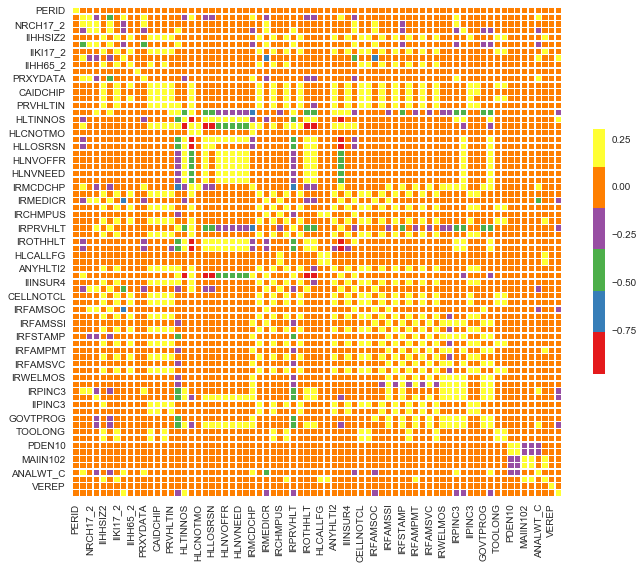

In [27]:
# Regardons la correlation en 3D sur ce jeu de données

sns.set(style="white")


# Calcule de la matrice de correlation 
corr = train.corr()

# configuration de la figure de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# colormap 
cmap = sns.diverging_palette(220, 10, as_cmap=True)



# Dessin du heatmap avec le masque et le ratio d'aspect correct
sns.heatmap(corr, cmap='Set1' , vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


In [28]:
# Rank correlation
train.corr('spearman').head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
PERID,1.000000,0.000199,-0.004183,0.004106,-0.003623,-0.001137,-0.004505,-0.001445,-0.004101,-0.010168,...,-0.002201,-0.002608,0.003790,-0.000682,0.003633,0.004055,-0.002664,-0.003162,0.003717,-0.000455
IFATHER,0.000199,1.000000,0.323702,-0.318736,0.016979,-0.476014,0.013033,0.122347,-0.018843,-0.002325,...,-0.054241,-0.003364,-0.007195,-0.004950,0.006691,0.007711,0.349590,0.004817,0.001345,-0.054509
NRCH17_2,-0.004183,0.323702,1.000000,0.326668,-0.061858,0.495657,-0.066734,-0.150193,-0.067089,0.071150,...,0.004654,0.009790,0.020022,0.022269,-0.005283,-0.005451,0.085522,0.001767,-0.001506,-0.098475
IRHHSIZ2,0.004106,-0.318736,0.326668,1.000000,-0.002731,0.759771,0.033229,-0.145559,0.042943,-0.081080,...,0.055409,0.022387,-0.034493,-0.032091,-0.022625,-0.021957,-0.153575,-0.005863,-0.001895,-0.069457
IIHHSIZ2,-0.003623,0.016979,-0.061858,-0.002731,1.000000,-0.001483,0.496471,0.006889,0.394555,-0.197878,...,0.036269,0.054371,0.003668,0.001274,0.014231,0.014206,0.004817,0.004713,0.003921,0.009238


# 2 Données manquantes 

Au niveau de la description des données nous avons pas pu avoir d'information si notre jeu de données contient des données manquantes ou pas. Par contre nous remarquons que le jeu de données contient des valeurs `-1` et donc on peut les supposer comme étant des missing values. 

 ####  2.1 Manipulation des données manqantes 
Nous allons remplacer les valeurs `-1` par `NA` afin de pouvoir faire la manipulation avec les missing values 

In [23]:
train[ train == -1] = np.nan
train.isnull().sum().head(5)

PERID        0
IFATHER      2
NRCH17_2    84
IRHHSIZ2     2
IIHHSIZ2     2
dtype: int64

In [24]:
test[test == -1] = np.nan
test.isnull().sum().head()

PERID       0
IFATHER     0
NRCH17_2    8
IRHHSIZ2    0
IIHHSIZ2    0
dtype: int64

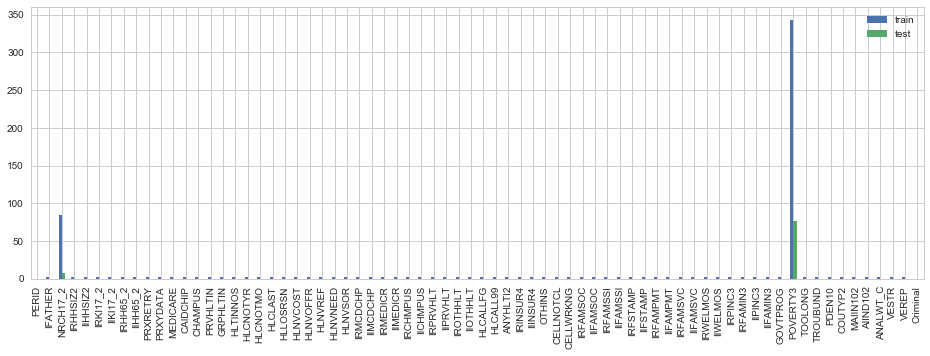

In [25]:
k= pd.DataFrame()
k['train']= train.isnull().sum()
k['test'] = test.isnull().sum()
fig,ax = plt.subplots(figsize=(16,5))
k.plot(kind='bar',ax=ax)

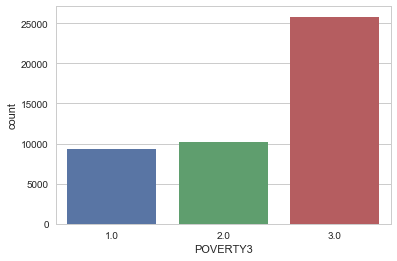

In [26]:
# plot de la variable avec plus de  valeur -1
sns.countplot(x='POVERTY3', data=train)

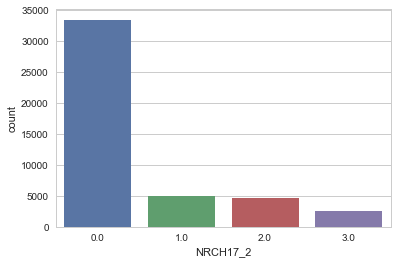

In [27]:
# plot de la variable avec plus de  valeur -1
sns.countplot(x='NRCH17_2', data=train)

Regardons le pourcentage des données manquantes dans notre jeu de données

In [28]:

def describe_missing_values(data):
    na_percent = {}
    N = data.shape[0]
    for column in data:
        na_percent[column] = data[column].isnull().sum() * 100 / N

    na_percent = dict(filter(lambda x: x[1] != 0, na_percent.items()))
    plt.bar(range(len(na_percent)), na_percent.values())
    plt.ylabel('Percent')
    plt.xticks(range(len(na_percent)), na_percent.keys(), rotation='vertical')
    plt.show()

Missing values for Train dataset


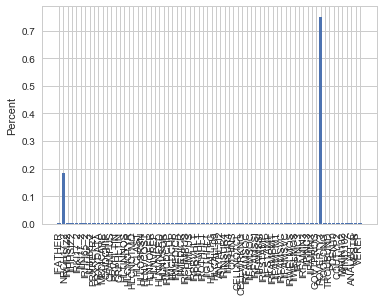

Missing values for Test dataset


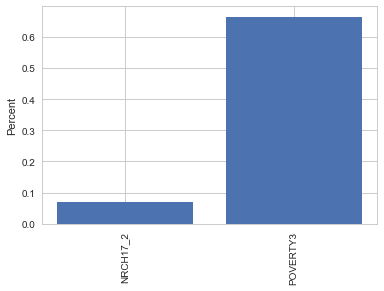

In [29]:
print("Missing values for Train dataset")
describe_missing_values(train)

print("Missing values for Test dataset")
describe_missing_values(test)

Nous allos imputer les données manquantes par leur moyenne


In [30]:
train.fillna(value=train.mean(), inplace=True)
test.fillna(value=test.mean(), inplace=True)

Missing values for Train dataset


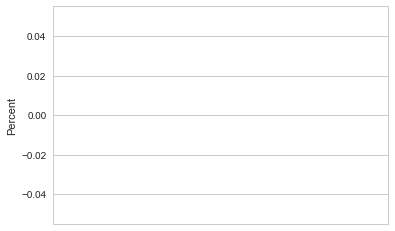

Missing values for Test dataset


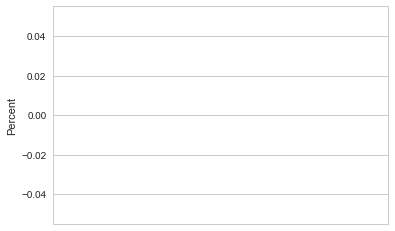

In [31]:
print("Missing values for Train dataset")
describe_missing_values(train)

print("Missing values for Test dataset")
describe_missing_values(test)

In [32]:
train.isnull().sum()
test.isnull().sum().head()

PERID       0
IFATHER     0
NRCH17_2    0
IRHHSIZ2    0
IIHHSIZ2    0
dtype: int64

4.00000    34873
1.00000     7780
2.00000     3050
3.00000       13
3.35574        2
Name: IFATHER, dtype: int64

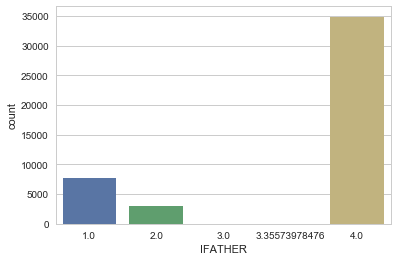

In [33]:
sns.countplot(x='IFATHER', data=train) 
train['IFATHER'].value_counts()

In [34]:
pd.Categorical(train)


[PERID, IFATHER, NRCH17_2, IRHHSIZ2, IIHHSIZ2, ..., AIIND102, ANALWT_C, VESTR, VEREP, Criminal]
Length: 72
Categories (72, object): [AIIND102, ANALWT_C, ANYHLTI2, CAIDCHIP, ..., TOOLONG, TROUBUND, VEREP, VESTR]

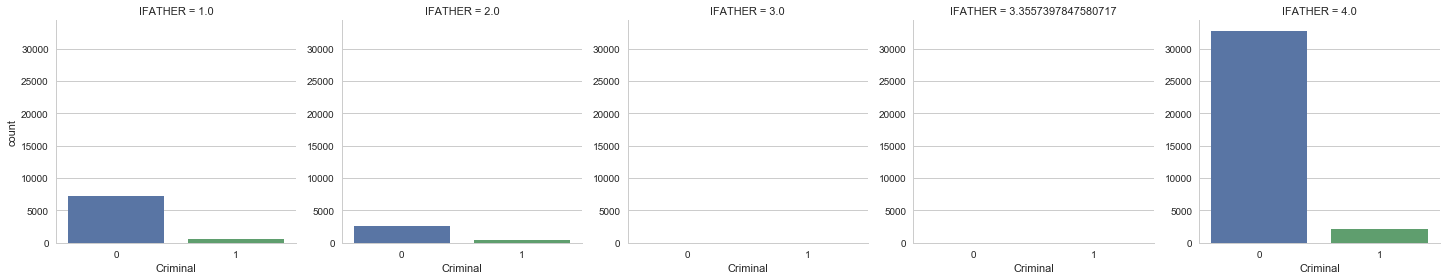

In [35]:
#la variable 'criminal' dans la distribution de la variable 'IFATHER'.
sns.factorplot(x='Criminal', col='IFATHER', kind='count', data=train)

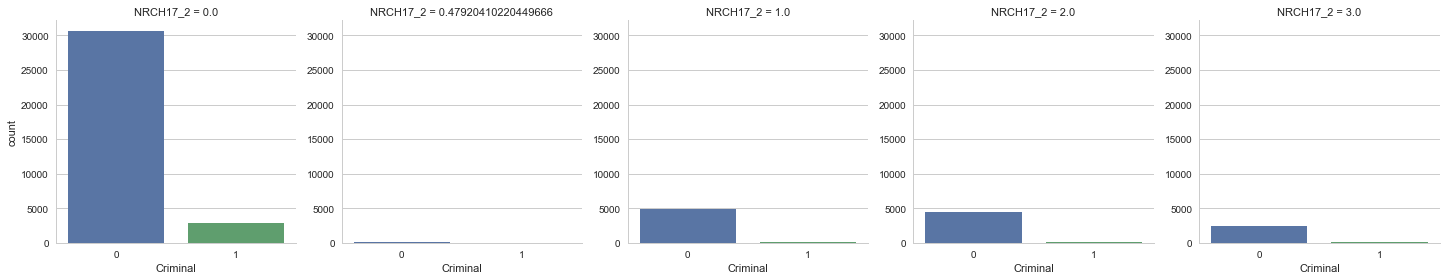

In [36]:
sns.factorplot(x='Criminal', col='NRCH17_2', kind='count', data=train)

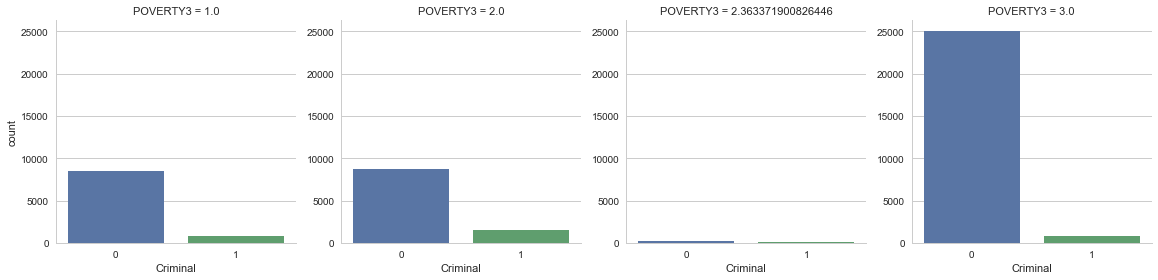

In [37]:
sns.factorplot(x='Criminal', col='POVERTY3', kind='count', data=train)

Nous pouvons faire un coupleplot qui est un excellent moyen d'afficher la plupart des informations que nous avons déjà découvertes dans une seule grille de tracés.

In [38]:
#sns.pairplot(train, hue='Criminal')

In [39]:
train.groupby('Criminal').PDEN10.describe()

,count,mean,std,min,25%,50%,75%,max
Criminal,,,,,,,,
0,42543.0,1.640676,0.617992,1.0,1.0,2.0,2.0,3.0
1,3175.0,1.720945,0.615581,1.0,1.0,2.0,2.0,3.0


In [40]:
train.groupby('Criminal').IRHH65_2.describe()

,count,mean,std,min,25%,50%,75%,max
Criminal,,,,,,,,
0,42543.0,1.148281,0.447535,1.0,1.0,1.0,1.0,3.0
1,3175.0,1.355906,0.664100,1.0,1.0,1.0,1.5,3.0


# 3. Algorithmes de prediction 

Nous avons gagné quelques aperçus de la parie EDA. Mais avec cela, nous ne pouvons pas précisement prévoir ou dire si personne commettra un crime ou pas. Maintenant nous prevoirons si une personne commetra un crime ou pas en utilisant quelles grands Algorithmes de Classification pour résoudre le problème qui nous est posé. 

###### 1) Regression logistique 

###### 2) K-Nearest Neighbours (KNN)

###### 3) Gaussien Naive Bayes (GNB)

##### 4) Support  Vector Machine (SVM)

##### 5) Decission Tree

##### 6) Random Forest 

##### 7) Gradient Boosting Classifier

A présent nous allons essayer de separer notre jeu de données Train en deux parties: une avec la variable `Criminal` et une autre sans la varible. 
Afin nous allons utiliser les algorithmes de prédictions en machine learning

In [41]:
# separation de la variable dependant et independant 

X = train.drop(['Criminal'], axis=1)
y = train["Criminal"]

In [42]:
#X.head()
y.head()


0    0
1    1
2    0
3    0
4    0
Name: Criminal, dtype: int64

In [43]:
#list1 = ['PERID']
#X = train.drop(list1,axis = 1)

#features = X.columns[x.columns!="Criminal"]

In [44]:
# split dans les données train et test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 1, stratify =train['Criminal'])

In [45]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [47]:
#def plot_variable_importance( X , y ):
 #   tree = DecisionTreeClassifier( random_state = 99 )
  #  tree.fit( X , y )
   # plot_model_var_imp( tree , X , y )

    
#def plot_model_var_imp( model , X , y ):
#   imp = pd.DataFrame( 
 #       model.feature_importances_  , 
  #      columns = [ 'Criminal' ] , 
   #     index = X.columns 
    #)
    #imp = imp.sort_values( [ 'Criminal' ] , ascending = True )
    #imp[ : 10 ].plot( kind = 'barh' )
    #print(model.score( X , y ))

In [48]:
final_test = sc.transform(test)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve, confusion_matrix
from sklearn.metrics import confusion_matrix

#### Logistic Regression 

In [49]:
# Effectuons un model de  regression logistique 

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
logreg_accy = round(accuracy_score(y_pred,y_test), 3)
print (logreg_accy)

0.938


In [50]:
print (classification_report(y_test, y_pred, labels=logreg.classes_))
print (confusion_matrix(y_pred, y_test))

             precision    recall  f1-score   support

          0       0.95      0.98      0.97     12763
          1       0.59      0.35      0.44       953

avg / total       0.93      0.94      0.93     13716

[[12537   623]
 [  226   330]]


In [51]:
accuracy_score(y_pred, y_test)

0.93810148731408571

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.98      0.97     12763
          1       0.59      0.35      0.44       953

avg / total       0.93      0.94      0.93     13716



#### K-Nearest Neighbours Classifier (KNN)  

In [53]:
#knn classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm='auto',
                           leaf_size=30, 
                           metric='minkowski',
                           metric_params=None, 
                           n_jobs=1,
                           n_neighbors=7, p=2,
                           weights='uniform' )
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
knn_accy = round(accuracy_score(y_test, y_pred), 3)
print ('Accuracy pour le KNN' ,knn_accy)

Accuracy pour le KNN 0.938


Verifions les accuracies en fonctions des valeurs `n_neighbours`.

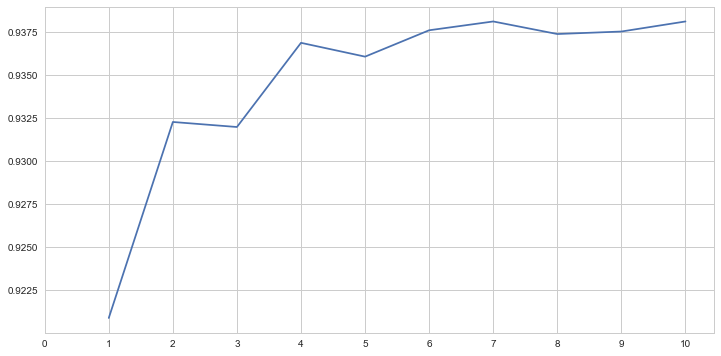

Accuracies pour les differentes n valeurs sont: [ 0.9208953   0.93226888  0.93197725  0.93686206  0.93606008  0.93759113
  0.93810149  0.93737241  0.93751823  0.93810149] avec la valeur maximal 0.938101487314


In [52]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    a=a.append(pd.Series(accuracy_score(prediction,y_test)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies pour les differentes n valeurs sont:',a.values,'avec la valeur maximal',a.values.max())

L'accuracy pour le modèle de KNN change en fonction de la valeur du `n_neighbours` qui lui est attribué. La valeur par defaut est ici `7` 

#### Gaussian Naive Bayes (GNB)

In [54]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test)
gaussian_accy = round(accuracy_score(y_pred, y_test), 3)
print('Accuracy pour le GNB' ,gaussian_accy)

Accuracy pour le GNB 0.422


###  linear Support Vector Machines (SVM)

In [55]:
# support vector machine

from sklearn.svm import SVC
svc = SVC(kernel = 'linear', C= 0.1, gamma=0.1)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
svc_accy = round(accuracy_score(y_pred, y_test), 3)
print(svc_accy)

0.941


### Nolinear SVM kernal = 'rbf'

In [56]:
# No linear support vector machine

from sklearn.svm import SVC
svc = SVC(kernel = 'rbf', C= 1, gamma=0.1)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
svc_accy = round(accuracy_score(y_pred, y_test), 3)
print(svc_accy)

0.944


### Nolinear SVM kernel = 'poly'

In [57]:
# No linear support vector machine

from sklearn.svm import SVC
svc = SVC(kernel = 'poly', C= 0.1, gamma=0.1)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
svc_accy = round(accuracy_score(y_pred, y_test), 3)
print(svc_accy)

0.945


### Decission Tree (DT)

In [58]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier( max_depth=5, 
                                class_weight = 'balanced',
                                min_weight_fraction_leaf = 0.01)
dectree.fit(x_train, y_train)
y_pred = dectree.predict(x_test)
dectree_accy = round(accuracy_score(y_pred, y_test), 3)
print(dectree_accy)

0.85


### Random Forest  (RF)

In [59]:
#random Forest
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(n_estimators=100, max_depth=6, 
                                      min_samples_leaf=100, 
                                      max_features=0.5, bootstrap=False, 
                                      n_jobs=-1, random_state=123)
#randomforest = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
random_accy = round(accuracy_score(y_pred, y_test), 3)
print (random_accy)

0.953


In [60]:
#test_submission.to_csv('submission_rf_.csv', index=False)

### Gradient Boosting Classifier (GB)

In [61]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gradient = GradientBoostingClassifier()
gradient.fit(x_train, y_train)
y_pred = gradient.predict(x_test)
gradient_accy = round(accuracy_score(y_pred, y_test), 3)
print(gradient_accy)


0.953


In [62]:
test_prediction = gradient.predict(final_test)
test.shape
test.head()
test.to_csv( 'sample_submission_criminal.csv' , index = False )

In [63]:
gradient_sub =  pd.read_csv('C:/Users/hp/Desktop/Cours_3A/DataCamp/Projet_data_camp/sub_edit.csv')

In [64]:
gradient_sub.head()

,PERID,Criminal
0,66583679,0
1,35494679,0
2,79424679,0
3,11744679,0
4,31554679,0


### Submission modèles de prediction pour la compétition 

In [64]:
featuers = train.columns[train.columns != 'Criminal']
train_x = train[featuers]
train_y = train['Criminal']
list =['PERID']
xx = train.drop(list, axis =1)
yy = test.drop(list, axis =1)
list1 = ['TROUBUND']
xx = xx.drop(list1,axis=1)
yy = yy.drop(list1,axis=1)
xx = xx.drop('Criminal',axis=1)
model = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)
model.fit(xx,train_y)
predicted = model.predict(yy)
sub2 = pd.DataFrame({'PERID':test.PERID, 'Criminal':predicted})
sub2 = sub2[['PERID', 'Criminal']]
sub2.to_csv('sub_gradient.csv', index=False)

### Cross Validation 

Le plus souvent les données que nous étudions sont déséquilibrés, soit il peut y avoir un nombre élevé de cas. Ainsi nous devrions former et tester notre algorithme sur chaque cas de l'ensemble de données.Alors nous pouvons prendre une moyenne de toutes les exactitudes célèbres sur l'ensemble de données.

1) Le K-Fold Cross Validation en divisant l'ensemble de données dans k-sous-ensembles.

2) Disons que nous divisons l'ensemble de données en (k=5) parties. Nous réservons une partie pour le test et formons l'algorithme sur les 4 parties.

3) Nous continuons le processus en changeant la partie de test dans chaque itération et formation de l'algorithme sur les autres parties. Les exactitudes et les erreurs sont alors atteintes en moyenne pour obtenir une exactitude moyenne de l'algorithme.

C'est ce qu'on appelle le K-Fold Cross Validation.

In [65]:
from sklearn.model_selection import KFold #Pour K-fold cross validation
from sklearn.model_selection import cross_val_score # evaluation du score 
from sklearn.model_selection import cross_val_predict #prediction


kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Logistic Regression','KNN','Gaussian Naive Bayes','Svm','Decision Tree','Random Forest', 'Grandient Boosting']
models=[LogisticRegression(),KNeighborsClassifier(n_neighbors=7),GaussianNB(),
        SVC(),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=50), GradientBoostingClassifier() ]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy") 
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    print(model)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
GaussianNB(priors=None)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
 

,CV Mean,Std
Logistic Regression,0.930553,0.002791
KNN,0.930093,0.003029
Gaussian Naive Bayes,0.924734,0.003020
Svm,0.930553,0.002791
Decision Tree,0.933834,0.002441
Random Forest,0.950741,0.002356
Grandient Boosting,0.952863,0.001798


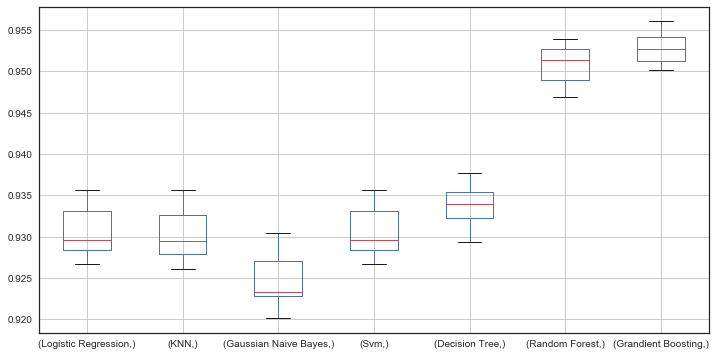

In [66]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

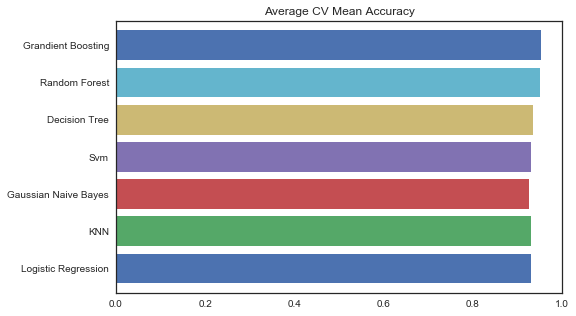

In [67]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()  

## Hyper-Parametres Tuning 


Les modèles de Machine Learning ressemblent à une Boîte noire. 
Il y a quelques valeurs de paramètre par défaut pour cette Boîte noire, que nous pouvons accorder ou changer pour obtenir
un meilleur modèle. Comme le C et le gamma dans le modèle de SVM et les paramètres de la même façon différents pour des classificateurs différents, sont appelé les hyper-paramètres, que nous pouvons régler pour changer le taux apprenant de l'algorithme et obtenir un meilleur modèle. On connaît ceci comme le Réglage Hyper-paramètre Turning.

Nous accorderons les hyper-paramètres pour les 2 meilleurs classificateurs soit le `RandomForests` et `GradientBoosting`.

### Random Forests 

In [73]:
from sklearn.model_selection import GridSearchCV
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 11.5min finished


0.951463318605
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


### Gradient Boosting 

In [54]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=GradientBoostingClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 32.3min finished


0.952731965528
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)


 Rergardons dans le cas du modèle de SVM avec les parametres C et gamma 

In [114]:
#from sklearn.model_selection import GridSearchCV
#from sklearn import svm #support vector Machine
#C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
#gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
#kernals = ['rbf']
#hyper={'kernel':kernals, 'C':C,'gamma':gamma}
#gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
#gd.fit(X,y)
#print(gd.best_score_)
#print(gd.best_estimator_)

## Ensembling 

`Ensembling` est une bonne façon d'augmenter l'exactitude ou la performance d'un modèle. En effet c'est la combinaison de modèles simples divers pour créer un seul modèle puissant.

En guise d'example si nous voulons acheter un smarphone et en demandant à beaucoup de personnes basé sur des paramètres divers. Alors se cas nous pouvons faire un jugement fort d'un seul produit après l'analyse de tous les paramètres différents. Ceci est l'Ensembling, qui améliore la stabilité du modèle. 
Nous pouvons le faire avec notre de jeu de données de la façons suivante:

1) `Voting Classifier`

2) `Bagging`

3) `Boosting`.

### Voting Classifier

C'est la façon la plus simple de prédictions en combinant beaucoup de modèles d'apprentissage automatique simples différents. Il donne un résultat de prédiction moyen basé sur la prédiction de tous les sous-modèles. 
Les sous-modèles ou le models de base étant tous de types diiferents.

In [146]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('LR',LogisticRegression(C=1)),
                                              ('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('NB',GaussianNB()),
                                               ('svm',SVC(kernel='linear',probability=True)),
                                              ('RBF',SVC(probability=True,kernel='rbf',C=1,gamma=0.1)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('RFor',RandomForestClassifier(n_estimators=200,random_state=0)),
                                              ('GBC',GradientBoostingClassifier(n_estimators=100, random_state = 0, verbose = 0))
                                             ], 
                       voting='soft').fit(x_train,y_train)




In [ ]:
#print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(x_test,x_test))
cross=cross_val_score(ensemble_lin_rbf,X,y, cv = 10,scoring = "accuracy")
#print('The cross validated score is',cross.mean())


## Bagging 

Le Bagging marche bien avec avec les modèles de haute à hautes variances. En guise d'exemple pour notre cas sa sera pour la Decission Tre et le Ransom Forest. Nous pouvons eventuellement utiliser le KNN avec un nombres petit de n_neighbours. 

In [65]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=10)
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print('The accuracy for bagged KNN is:',accuracy_score(prediction,y_test))
result=cross_val_score(model,X,y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.932414698163
The cross validated score for bagged KNN is: 0.919812916362


On est pourrait avoir un resultat nettement supérieur est le Bagging du KNN en augement le `n_estimators` jusqu'à `700` par example. Mais défaut de mémoire de mon mon ordinateur j'ai limité les    

### Bagged Decission Tree 

In [66]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                        random_state=0,n_estimators=100)
model.fit(x_train,y_train)
prediction=model.predict(x_test)

print('The accuracy for bagged Decision Tree is:',
      accuracy_score(prediction,y_test))
result=cross_val_score(model,X,y,cv=10,scoring='accuracy')

print('The cross validated score for bagged Decision Tree is:',
      result.mean())

The accuracy for bagged Decision Tree is: 0.949693788276
The cross validated score for bagged Decision Tree is: 0.951091468234


### Bagged GaussianNB()

In [73]:
model=BaggingClassifier(base_estimator=GaussianNB(),
                        random_state=0,n_estimators=10)
model.fit(x_train,y_train)
prediction=model.predict(x_test)

print('The accuracy for bagged GaussianNB:',
      accuracy_score(prediction,y_test))
result=cross_val_score(model,X,y,cv=10,scoring='accuracy')

print('The cross validated score for bagged GaussianNB is:',
      result.mean()) 

The accuracy for bagged GaussianNB: 0.422863808691
The cross validated score for bagged GaussianNB is: 0.924603067157


### Boosting 

Boosting est un technique d'Ensembling qui utilise l'apprentissage séquentiel de classificateurs. 
Il améliore pas à pas un modèle faible.

Le Boosting marche comme suit :

Un modèle est d'abord formé sur l'ensemble de données complet. Maintenant le modèle fera bien quelques cas tandis que certains mal. Maintenant dans l'itération suivante, l'apprenant se concentrera plus sur les cas à tort prévus ou y donnera plus de poids. Ainsi il essayera de prévoir le mauvais cas correctement. Maintenant ce processus itératif continu et nouveau classifeur est ajouté au modèle jusqu'à ce que la limite soit atteinte sur l'exactitude.

#### AdaBoost 

L'apprenant faible ou l'estimateur est dans ce cas un Arbre Decision (Decission Tree). 
Mais nous pouvons changer le dafault base_estimator à n'importe quel algorithme de notre choix.

In [70]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.952206910767


### Submission Adaboost 

In [116]:
featuers = train.columns[train.columns != 'Criminal']
train_x = train[featuers]
train_y = train['Criminal']
list =['PERID']
xx = train.drop(list, axis =1)
yy = test.drop(list, axis =1)
list1 = ['TROUBUND']
xx = xx.drop(list1,axis=1)
yy = yy.drop(list1,axis=1)
xx = xx.drop('Criminal',axis=1)
model = AdaBoostClassifier(n_estimators=300,random_state=0,learning_rate=0.1)
model.fit(xx,train_y)
predicted = model.predict(yy)
sub2 = pd.DataFrame({'PERID':test.PERID, 'Criminal':predicted})
sub2 = sub2[['PERID', 'Criminal']]
sub2.to_csv('sub_adaboost.csv', index=False)

#### Stochastic Gradient Boosting 

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.952031808264


#### Xgboost 

In [101]:
#import xgboost as xg
#xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
#result=cross_val_score(xgboost,X,y,cv=10,scoring='accuracy')
#print('The cross validated score for XGBoost is:',result.mean())

Pour Xgboost ma machine a du mal à l'installer avec le terminal Anaconda Prompt, raison pour laquelle j'ai pas pu tourner le code.

Nous avons obtenu l'exactitude la plus haute pour AdaBoost. 
Nous essayerons de l'augmenter avec l'Hyper-Parameter Turning

#### Hyper-Parameter Tuning for AdaBoost

In [77]:
from sklearn.model_selection import GridSearchCV
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed: 199.2min finished


0.952010149175
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.05, n_estimators=300, random_state=None)


####  Matrice de Confusion pour le Meilleur Modèle

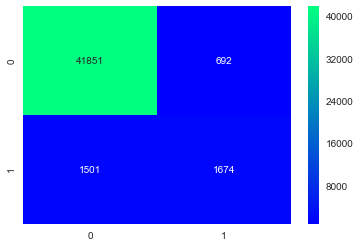

In [81]:
from sklearn.model_selection import cross_val_predict #prediction
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,y,cv=10)
sns.heatmap(confusion_matrix(y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

### Feature Importance

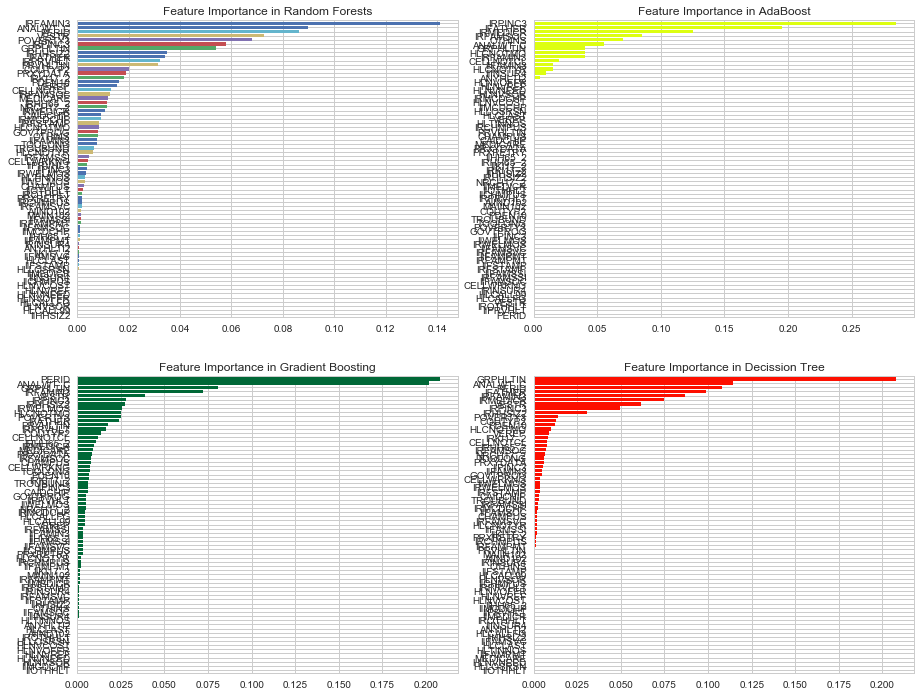

In [85]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
model.fit(X,y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in Decission Tree')
plt.show()                                              

Nous pouvons voir les caractéristiques importantes pour des classificateurs divers comme RandomForests, AdaBoost, etc.

# Observations


1)  Certaines des caractéristiques importantes communes sont `ANALWT_C`, `GRPHLTIN`, `IFATHER`